# ML - TREE

## Create a classification tree based on this data and measure the accuracy

In [1]:
#!/usr/bin/env python3
"""
Created on Thu Mar  1 16:38:11 2018

@author: Yangfan Cui
"""

# Create a classification tree based on this data and measure the accuracy.
import pandas as pd
names = ['Industrial Risk','Management Risk','Financial Flexibility','Credibility',
         'Competitiveness','Operating Risk','Class']
DatBkruptcy = pd.read_table("Qualitative_Bankruptcy.data.txt", names=names,sep=',')
print(DatBkruptcy.head())

  Industrial Risk Management Risk Financial Flexibility Credibility  \
0               P               P                     A           A   
1               N               N                     A           A   
2               A               A                     A           A   
3               P               P                     P           P   
4               N               N                     P           P   

  Competitiveness Operating Risk Class  
0               A              P    NB  
1               A              N    NB  
2               A              A    NB  
3               P              P    NB  
4               P              N    NB  


### Convert labels into floats

In [2]:
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['P','A','N'])
le.get_params()
df = pd.DataFrame()
for i in names[0:6]:
    df[i] = le.transform(DatBkruptcy[i])
le1 = LabelEncoder()
le1.fit(DatBkruptcy.values[:,6])
df[names[-1]] = le1.transform(DatBkruptcy[names[-1]])
'''
DatBkruptcy[DatBkruptcy=='P']=1
DatBkruptcy[DatBkruptcy=='A']=0
DatBkruptcy[DatBkruptcy=='N']=2
print(DatBkruptcy.head())

  Industrial Risk Management Risk Financial Flexibility Credibility  \
0               1               1                     0           0   
1               2               2                     0           0   
2               0               0                     0           0   
3               1               1                     1           1   
4               2               2                     1           1   

  Competitiveness Operating Risk Class  
0               0              1    NB  
1               0              2    NB  
2               0              0    NB  
3               1              1    NB  
4               1              2    NB  


### Accuracy of predictions

In [3]:
from sklearn.model_selection import train_test_split
train_X,test_X, train_y, test_y = train_test_split(DatBkruptcy[names[0:6]], DatBkruptcy[names[-1]], test_size = 0.2,random_state = 0)  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(train_X,train_y)
from sklearn.metrics import accuracy_score
outTree = clf.predict(test_X)
print("Accuracy for Decision Tree Classifier:" + str(accuracy_score(test_y,outTree)*100)+"%")

Accuracy for Decision Tree Classifier:100.0%


All the predictions generated by decision tree is exact same as the test set.

### Plot the decision tree

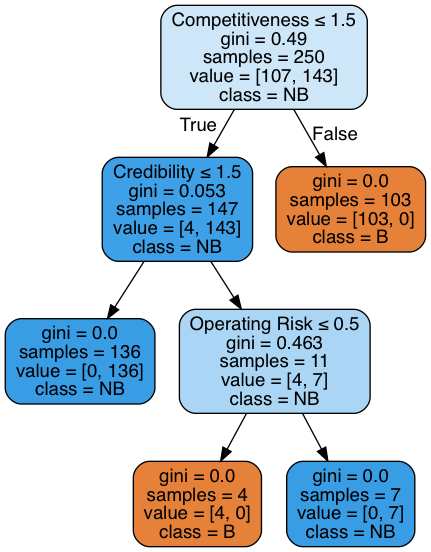

In [4]:
DT = DecisionTreeClassifier(random_state=1)
DT.fit(DatBkruptcy[names[0:6]],DatBkruptcy[names[-1]])
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(DT, out_file=None, 
                     feature_names=names[0:6],
                     class_names=['B','NB'],  
                     filled=True, rounded=True,  
                     special_characters=True)   
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

### The accuracy of Decision tree model

In [5]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10,random_state=1)
tree = DecisionTreeClassifier(criterion = 'gini',random_state=1)
results = model_selection.cross_val_score(tree,DatBkruptcy[names[0:6]],DatBkruptcy[names[-1]],cv = kfold)
print(results.mean())

0.988


## Improve the accuracy of your decision tree by using bagging

In [6]:
from sklearn.ensemble import BaggingClassifier
kfold = model_selection.KFold(n_splits=10, random_state=0)
num_trees = 100
model = BaggingClassifier(base_estimator=clf, n_estimators=num_trees, random_state=1)
results = model_selection.cross_val_score(model, DatBkruptcy[names[0:6]],DatBkruptcy[names[-1]], cv=kfold)
print(results.mean())

0.992


## Improve the accuracy of your decision tree by using boosting

### AdaBoost

In [7]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=1)
ada_boost = AdaBoostClassifier(n_estimators=num_trees, random_state=1)
results = model_selection.cross_val_score(ada_boost,DatBkruptcy[names[0:6]],DatBkruptcy[names[-1]], cv=kfold)
print(results.mean())

0.996


### Stochastic Graidient Boosting

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=1)
SG_boosting = GradientBoostingClassifier(n_estimators=num_trees, random_state=1)
results = model_selection.cross_val_score(SG_boosting, DatBkruptcy[names[0:6]],DatBkruptcy[names[-1]], cv=kfold)
print(results.mean())

0.992


## Try to find another method to improve the accuracy.

### Voting Classifier

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = BaggingClassifier(base_estimator=clf, n_estimators=num_trees, random_state=1)
clf3 = RandomForestClassifier(random_state=1)
clf4 = GaussianNB()
clf5 = LinearDiscriminantAnalysis()
clf6 = DecisionTreeClassifier(criterion = 'gini',random_state=1)

eclf = VotingClassifier(estimators=[('lr', clf1), ('bc',clf2),('rf', clf3), ('gnb', clf4),('LDA',clf5),('DT',clf6)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, eclf], ['Logistic Regression', 'Bagging','Random Forest', 'naive Bayes', 'LDA','Decision Tree','Ensemble']):
    scores = model_selection.cross_val_score(clf, DatBkruptcy[names[0:6]],DatBkruptcy[names[-1]], cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.05) [Logistic Regression]
Accuracy: 0.99 (+/- 0.02) [Bagging]
Accuracy: 1.00 (+/- 0.01) [Random Forest]
Accuracy: 0.96 (+/- 0.04) [naive Bayes]
Accuracy: 0.96 (+/- 0.05) [LDA]
Accuracy: 1.00 (+/- 0.00) [Decision Tree]
Accuracy: 1.00 (+/- 0.01) [Ensemble]


Here, I chose to use voting classifier to improve the accuracy of decision tree. To be more precise, it is a majority or hard voting. The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses. In majority voting, the predicted class label for a particular sample is the class label that represents the majority (mode) of the class labels predicted by each individual classifier.